In [1]:
import os
import keras
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, array_to_img, load_img
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPool2D, Dropout
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
from PIL import Image
from tensorflow.keras.optimizers import Adam


In [2]:
data_dir = 'C:/Gtsrb'
train_path = 'C:/Gtsrb/Train'
test_path = 'C:/Gtsrb/'
categories = os.listdir(train_path)
num_categories = len(categories)
num_categories

43

In [3]:
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

In [21]:
def load_data(data_dir):
   
    images = list()
    labels = list()
    for category in range(num_categories):
        categories = os.path.join(data_dir, str(category))
        for img in os.listdir(categories):
            img = load_img(os.path.join(categories, img), target_size=(30, 30))
            image = img_to_array(img)
            images.append(image)
            labels.append(category)
    return images, labels

In [41]:
images, labels = load_data(train_path)

# One hot encoding the labels
labels = to_categorical(labels)

# Splitting the dataset into training and test set
X_train, X_test, y_train, y_test = train_test_split(
                                                    np.array(images),
                                                    labels,
                                                    test_size=0.2 , 
                                                    random_state=42, 
                                                    shuffle=True
                                                    )

X_train = X_train/255 
X_test = X_test/255

In [42]:
print("X_train.shape", X_train.shape)
print("X_valid.shape", X_test.shape)
print("y_train.shape", y_train.shape)
print("y_valid.shape", y_test.shape)

X_train.shape (31367, 30, 30, 3)
X_valid.shape (7842, 30, 30, 3)
y_train.shape (31367, 43)
y_valid.shape (7842, 43)


In [7]:
model = keras.models.Sequential([    
    keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(30,30,3)),
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(rate=0.5),
    
    keras.layers.Dense(43, activation='softmax')
])

In [9]:
def prep_dataset(X,y):
    X_prep = X.astype('float32')
    y_prep = to_categorical(np.array(y))
    return (X_prep, y_prep)

X, y = prep_dataset(data,labels)

In [8]:
datagen = ImageDataGenerator(rotation_range=10,
                             zoom_range=0.2,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             shear_range=0.1,
                             horizontal_flip=False,
                             vertical_flip=False,
                             fill_mode="nearest")



In [9]:
optimizer=keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=optimizer,
             loss='categorical_crossentropy',
             metrics=['accuracy'])

history= model.fit(datagen.flow(X_train, y_train, batch_size=64),
                 epochs=25,
                 validation_data=(X_test,y_test))

Epoch 1/25
491/491 [==============================] - 133s 270ms/step - loss: 1.2565 - accuracy: 0.6534 - val_loss: 1.5232 - val_accuracy: 0.5221
Epoch 2/25
491/491 [==============================] - 113s 230ms/step - loss: 0.2561 - accuracy: 0.9212 - val_loss: 0.0533 - val_accuracy: 0.9832
Epoch 3/25
491/491 [==============================] - 125s 254ms/step - loss: 0.1438 - accuracy: 0.9551 - val_loss: 0.0324 - val_accuracy: 0.9907
Epoch 4/25
491/491 [==============================] - 130s 265ms/step - loss: 0.1062 - accuracy: 0.9671 - val_loss: 0.0345 - val_accuracy: 0.9899
Epoch 5/25
491/491 [==============================] - 137s 279ms/step - loss: 0.0875 - accuracy: 0.9719 - val_loss: 0.0364 - val_accuracy: 0.9885
Epoch 6/25
491/491 [==============================] - 157s 321ms/step - loss: 0.0790 - accuracy: 0.9748 - val_loss: 0.0499 - val_accuracy: 0.9841
Epoch 7/25
491/491 [==============================] - 136s 277ms/step - loss: 0.0655 - accuracy: 0.9784 - val_loss: 0.0233 -

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        4640      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 13, 13, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 9, 9, 128)         7

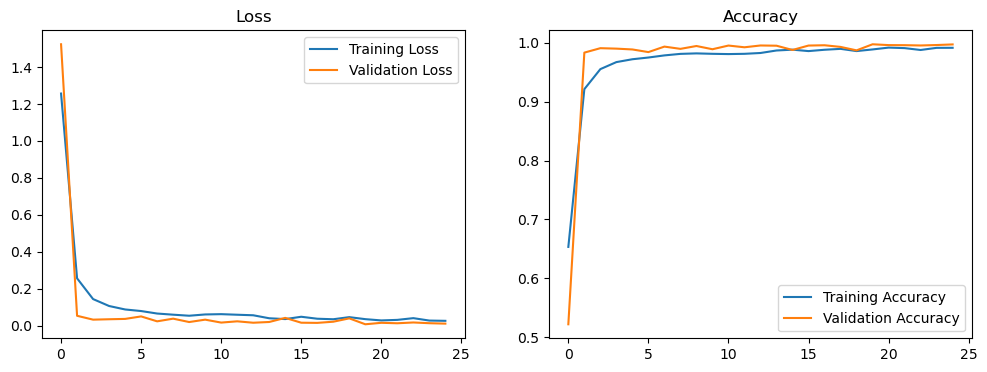

In [38]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.show()

In [43]:
loss, accuracy = model.evaluate(X_test, y_test)

print('test set accuracy: ', accuracy * 100)

246/246 [==============================] - 1s 4ms/step - loss: 0.0109 - accuracy: 0.9971
test set accuracy:  99.70670938491821


In [44]:
from sklearn.metrics import accuracy_score
import pandas as pd

Y_test = pd.read_csv(test_path + 'Test.csv')
test_labels = Y_test["ClassId"].values
test_images = Y_test["Path"].values

output = list()
for img in test_images:
    image = load_img(os.path.join(test_path, img), target_size=(30, 30))
    output.append(np.array(image))

X_test=np.array(output)
pred = model.predict(X_test)
pred=np.argmax(pred, axis=1)

#Accuracy with the test data
print('Test Data accuracy: ',accuracy_score(test_labels, pred)*100)

395/395 [==============================] - 1s 4ms/step
Test Data accuracy:  82.0031670625495


In [46]:
from sklearn.metrics import classification_report

print(classification_report(test_labels, pred))

              precision    recall  f1-score   support

           0       0.34      0.97      0.50        60
           1       1.00      0.60      0.75       720
           2       1.00      0.83      0.91       750
           3       0.97      0.28      0.44       450
           4       0.94      0.87      0.90       660
           5       0.97      0.84      0.90       630
           6       1.00      0.01      0.03       150
           7       1.00      0.69      0.82       450
           8       1.00      0.70      0.82       450
           9       0.98      0.79      0.88       480
          10       0.99      0.87      0.93       660
          11       0.99      0.85      0.91       420
          12       1.00      0.98      0.99       690
          13       0.99      0.99      0.99       720
          14       0.91      1.00      0.95       270
          15       0.88      0.99      0.93       210
          16       0.28      1.00      0.44       150
          17       0.76    

In [47]:
model.save('road_sleuth.h5')